#Assignment Set 2
by **Amir Mehrpanah** for Deep Learing Course at Data Science Center, SBU



## Test Against a High Degree Purturbed Polynomial

In [9]:
N = 32**2
x = (np.random.random((N))-.5)*14
y = .000001 *(x-15)*(x-10)*(x-5)*(x+10)*(x-7)*(x+20)*(x+7)*(x+15)*(x) + np.random.randn(N)*25
x_train,x_test,y_train,y_test = train_test_split(x.reshape(-1,1),y.reshape(-1,1),test_size=.3)

### Train a Tensorflow Model

In [10]:
inputs = layers.Input((1,1))
outputs = layers.Dense(1)(inputs)
mdl = Model(inputs=inputs,outputs=outputs)
mdl.compile(optimizer='sgd',loss='mse')
mdl.fit(x_train,y_train,batch_size=32,verbose=0,epochs=16)
mdl.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
dense (Dense)                (None, 1, 1)              2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Train an Action Sequence

In [24]:
data_iterator = DataIterator(x_train,y_train)
acsq = ActionSequence('test',1,loss_type=LossFunctions.MSE)\
                    .add_action(Actions.Dense,1,WeightInitMethods.normal)
acsq.fit(data_iterator,epochs=16,verbosity=0)                             
print(acsq)

test:

	Dense(1:1)_0
---------------------------------


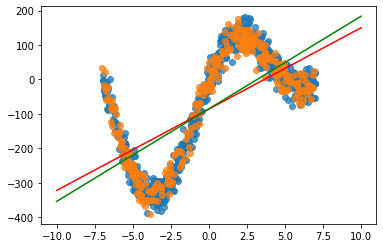

In [25]:
x = np.linspace(-10,10,200)
y1 = mdl.predict(x).squeeze()
y2 = acsq(x.reshape(-1,1))
plt.plot(x,y1,c='r')
plt.plot(x,y2,c='g')
plt.scatter(x_train,y_train,alpha=.75)
plt.scatter(x_test,y_test,alpha=.75)
plt.show()

## Test Against California Housing Data

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


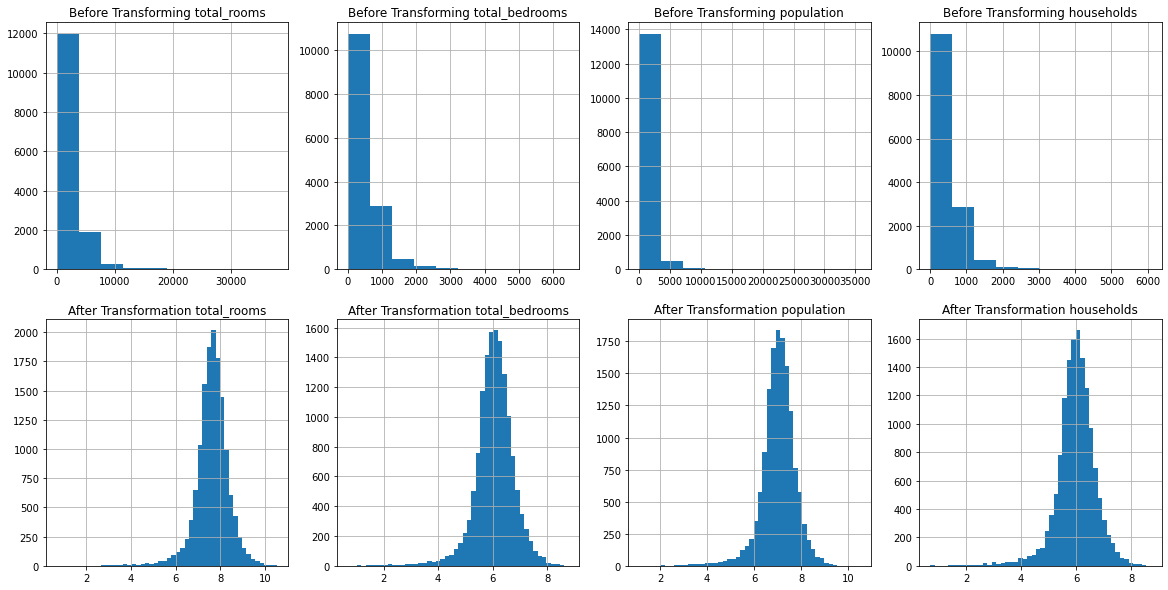

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
test_size = 0.3
x = pd.read_csv('data/housing.csv').dropna()
y = x.pop('median_house_value')
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size)

plt.figure(figsize=(20,10))
for i,idx in enumerate(['total_rooms',
                        'total_bedrooms',
                        'population',
                        'households']):
    ax = plt.subplot(2,4,i+1)
    ax.set_title('Before Transforming '+idx)
    x_train.loc[:,idx].hist()

    ax = plt.subplot(2,4,i+5)
    ax.set_title('After Transformation '+idx)
    x_train.loc[:,idx] = np.log(x_train.loc[:,idx])
    x_test.loc[:,idx] = np.log(x_test.loc[:,idx]) # in the transformation pipeline
    x_train.loc[:,idx].hist(bins=50)
plt.show()

mapping = {'<1H OCEAN': 5, 
           'INLAND': 4,
           'ISLAND': 1,
           'NEAR BAY': 2,
           'NEAR OCEAN': 3}
x_train['ocean_proximity'] = x_train['ocean_proximity'].astype('category').map(mapping).astype('float')
x_test['ocean_proximity'] = x_test['ocean_proximity'].astype('category').map(mapping).astype('float') # in the transformation pipeline

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # in the transformation pipeline
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.1)

### Train a Tensorflow Model

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


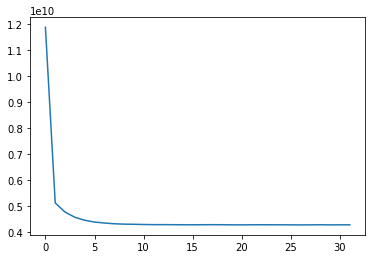

In [37]:
inputs = layers.Input(shape=(9))
output = layers.Dense(1,activation='relu')(inputs)
model = Model(inputs=inputs, outputs=output)
'''
    for bigger networks we need adam optimizer
    which has not yet been implemented for
    action sequences thus we prefer a simpler
    network for the sake of comparability
'''
model.compile(optimizer="sgd", loss="mse") 
model.summary()

history = model.fit(x_train, y_train,
          batch_size= 64,
          epochs=32,
          verbose=0).history
plt.plot(range(32),history['loss'])
plt.show()

### Train an Action Sequence

test:

	Dense(9:1)_0
---------------------------------
	Relu(1:1)_1
---------------------------------


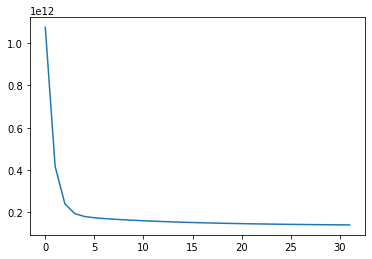

In [35]:
data_iterator = DataIterator(x_train,y_train.to_numpy().reshape(-1,1))
epox = 32
acsq = ActionSequence('test',9,loss_type=LossFunctions.MSE)\
                    .add_action(Actions.Dense,1,WeightInitMethods.he_et_al)\
                    .add_action(Actions.Relu)
acsq_history = acsq.fit(data_iterator,epochs=epox,verbosity=0)                             
print(acsq)
plt.plot(range(epox),acsq_history)
plt.show()

'''
    the higher loss in the first step is the
    direct result of different weight
    initialization methods
'''

## Unit Tests

In [8]:
#@title Unit Tests
class TestNotebook(unittest.TestCase):
    def test_data_iterator_x_and_y_bad_input_size_exception(self):
        x = np.array([[10,-10],[10,10]])
        y = np.array([[10]])
        with self.assertRaises(Exception) as exception_context:
            test = DataIterator(x,y,batch_size=1)

        self.assertEqual(
            str(exception_context.exception),
            'x and y must have the same size at dim 0')
    
    def test_data_iterator_batch_size_bigger_than_input_size_exception(self):
        x = np.array([[10,-10],[10,10]])
        y = np.array([[10],[2]])
        with self.assertRaises(Exception) as exception_context:
            test = DataIterator(x,y)

        self.assertEqual(
            str(exception_context.exception),
            'batch size should be smaller than dim 0 of x')
        
    def test_data_iterator(self):
        x = np.array([[0,10],
                      [1,10],
                      [2,10],
                      [3,10],
                      [4,10],
                      [5,10],
                      [6,10]])
        y = np.array([[0],
                      [1],
                      [2],
                      [3],
                      [4],
                      [5],
                      [6]])
        batch_size = 2
        dtitr = DataIterator(x,y,batch_size=batch_size)
        i=0
        for xbatch,ybatch in dtitr:
            np.testing.assert_array_equal(x[i:i+batch_size],xbatch)
            np.testing.assert_array_equal(y[i:i+batch_size],ybatch)
            i+=batch_size

    def test_activation_function_relu(self):
        input = np.array([10,-10])
        output = np.array([10,0])
        val = Actions.Relu(2)(input)
        np.testing.assert_array_equal(val,output)

        input = np.array([-2,-1,1,2])
        output = np.array([0,0,1,1])
        relu = Actions.Relu(4)
        relu(input)
        val = relu.d
        np.testing.assert_array_equal(val,output)

    def test_activation_function_maxpooling1d(self):
        input = np.array([1,2,3,4,5,6])

        output = np.array([2,4,6])
        trued = np.array([0,1,0,1,0,1])
        mxpl1d = Actions.MaxPool1d(6,2,2)
        val = mxpl1d(input)
        d = mxpl1d.d
        np.testing.assert_array_equal(val,output)
        np.testing.assert_array_equal(d,trued)
        self.assertEqual(mxpl1d.n_out_units,3)

        output = np.array([3,4,5,6])
        trued = np.array([0,0,1,1,1,1])
        mxpl1d = Actions.MaxPool1d(6,3,1)
        val = mxpl1d(input)
        d = mxpl1d.d
        np.testing.assert_array_equal(val,output)
        np.testing.assert_array_equal(d,trued)
        self.assertEqual(mxpl1d.n_out_units,4)

        output = np.array([3,6])
        trued = np.array([0,0,1,0,0,1])
        mxpl1d = Actions.MaxPool1d(6,3,3)
        val = mxpl1d(input)
        d = mxpl1d.d
        np.testing.assert_array_equal(val,output)
        np.testing.assert_array_equal(d,trued)
        self.assertEqual(mxpl1d.n_out_units,2)

        output = np.array([3])
        trued = np.array([0,0,1,0,0,0])
        mxpl1d = Actions.MaxPool1d(6,3,4)
        val = mxpl1d(input)
        d = mxpl1d.d
        np.testing.assert_array_equal(val,output)
        np.testing.assert_array_equal(d,trued)
        self.assertEqual(mxpl1d.n_out_units,1)

    def test_creating_layer_with_less_than_1_number_of_in_units_exception(self):
        with self.assertRaises(Exception) as exception_context:
            lyr = Actions.Dense(0,1)

        self.assertEqual(
            str(exception_context.exception),
            'Can\'t create an action with less than 1 number of input units')

    def test_creating_layer_with_less_than_1_number_of_out_units_exception(self):
        with self.assertRaises(Exception) as exception_context:
            lyr = Actions.Dense(1,0)

        self.assertEqual(
            str(exception_context.exception),
            'Can\'t create an action with less than 1 number of output units')

    def test_calling_layer_base_class(self):
        lyr = Actions.Action(10,10,False)
        input = np.array([[10,-10]])
        with self.assertRaises(Exception) as exception_context:
            lyr(input)

        self.assertEqual(
            str(exception_context.exception),
            'Action is not callable')

    def test_dense_weights_bias_false_shape(self):
        lyr = Actions.Dense(11,6,bias=False)
        self.assertEqual(lyr.weights.shape,(11,6))

    def test_dense_weights_bias_true_shape(self):
        lyr = Actions.Dense(128,6,bias=True)
        self.assertEqual(lyr.weights.shape,(129,6))

    def test_dense_singleio_no_random_weights_no_activation_fuction(self):
        lyr = Actions.Dense(1,1)
        lyr.weights = np.array([2, 2])
        input = np.array([[10]])
        output = np.array([22])
        np.testing.assert_array_equal(lyr(input),output)
    
    def test_dense_singleio_random_weights_no_activation_fuction(self):
        lyr = Actions.Dense(1,1)
        weights = lyr.weights
        input = np.array([[1 ,10]])
        input_model = np.array([[10]])
        output = np.matmul(input,weights)
        np.testing.assert_array_equal(lyr(input_model),output)
    
    def test_dense_multii_singleo_no_activation_function(self):
        lyr = Actions.Dense(5,1)
        weights = lyr.weights
        input = np.array([[1, -5, -4, 2, 3, 5]])
        input_model = np.array([[-5, -4, 2, 3, 5]])
        output = np.matmul(input,weights)
        np.testing.assert_array_equal(lyr(input_model),output)

    def test_dense_multii_multio_no_activation_function(self):
        lyr = Actions.Dense(5,3)
        weights = lyr.weights
        input = np.array([[1, -5, -4, 2, 3, 5]])
        input_model = np.array([[-5, -4, 2, 3, 5]])
        output = np.matmul(input,weights)
        np.testing.assert_array_equal(lyr(input_model),output)

    def test_add_input_layer(self):
        sql = ActionSequence('sql',n_in_units = 100, loss_type=LossFunctions.MSE)
        self.assertEqual(sql.n_in_units,100)

    def test_add_one_layer(self):
        sql = ActionSequence('sql',n_in_units=100,loss_type=LossFunctions.MSE)
        sql.add_action(Actions.Dense,10)
        self.assertEqual(sql.actions[-1].n_in_units,100)
        self.assertEqual(sql.actions[-1].n_out_units,10)

    def test_add_many_layers(self):
        sql = ActionSequence('sql',n_in_units=100,loss_type=LossFunctions.MSE)
        sql.add_action(Actions.Dense,90)
        self.assertEqual(sql.actions[-1].n_in_units,100)
        self.assertEqual(sql.actions[-1].n_out_units,90)
        sql.add_action(Actions.Dense,80)
        self.assertEqual(sql.actions[-1].n_in_units,90)
        self.assertEqual(sql.actions[-1].n_out_units,80)
        sql.add_action(Actions.Dense,60)
        self.assertEqual(sql.actions[-1].n_in_units,80)
        self.assertEqual(sql.actions[-1].n_out_units,60)

    def test_add_action_name_imputation(self):
        sql = ActionSequence('sql',n_in_units=100,loss_type=LossFunctions.MSE)
        sql.add_action(Actions.Dense,10)
        self.assertEqual(sql.actions[-1].name,'Dense(100:10)_0')
        sql.add_action(Actions.Relu)
        self.assertEqual(sql.actions[-1].name,'Relu(10:10)_1')

    def test_add_action_arg_list(self):
        sql = ActionSequence('sql',64,loss_type=LossFunctions.MSE)
        action_args = [(Actions.Dense,32),
                       (Actions.Relu,),
                       (Actions.MaxPool1d,3,3)]
        sql.add_actions(action_args)
        for i,action in enumerate(sql.actions):
            self.assertIsInstance(action,action_args[i][0])

    def test_action_sequence_forwardpass(self):
        sql = ActionSequence('sql',2,loss_type=LossFunctions.MSE)
        action_args = [(Actions.Dense,2),
                       (Actions.Relu,)]
        sql.add_actions(action_args)
        input1 = np.array([[2,3]]) 
        input2 = np.array([[1,2,3]]) 
        sql.actions[0].weights
        output = Actions.Relu(2)(np.matmul(input2,sql.actions[0].weights))
        np.testing.assert_array_equal(sql(input1),output)
    
    def test_action_sequence_backwardpass_loss_exception(self):
        sql = ActionSequence('sql',2,loss_type=LossFunctions.MSE)
        action_args = [(Actions.Dense,1),
                       (Actions.Relu,)]
        sql.add_actions(action_args)
        input1 = np.array([[2,3]]) 
        true = np.array([[5]])
        output = sql(input1)
        with self.assertRaises(Exception) as exception_context:
            sql.backward()

        self.assertEqual(
            str(exception_context.exception),
            'Loss function should be called before backward method')
        
    def test_action_sequence_backwardpass_without_action_exception(self):
        sql = ActionSequence('sql',2,loss_type=LossFunctions.MSE)
        input1 = np.array([[2,3]]) 
        output = sql(input1)
        with self.assertRaises(Exception) as exception_context:
            sql.backward()

        self.assertEqual(
            str(exception_context.exception),
            'At least one action should be added to the model')
        
    def test_action_sequence_backwardpass_improves_output(self):
        sql = ActionSequence('sql',2,loss_type=LossFunctions.MSE)
        action_args = [(Actions.Dense,2)]
        sql.add_actions(action_args)
        input1 = np.array([[2,3]]) 
        true = np.array([[5]])
        output = sql(input1)
        loss = sql.compute_loss(output,true)
        sql.backward()
        output = sql(input1)
        loss_after_backward = sql.compute_loss(output,true)
        np.testing.assert_array_less(loss_after_backward,loss)

    def test_action_sequence_batch_forwadpass(self):
        sql = ActionSequence('sql',2,loss_type=LossFunctions.MSE)
        action_args = [(Actions.Dense,2)]
        sql.add_actions(action_args)
        input1 = np.array([[2,3],[2,4],[4,5],[1,5]]) 
        true = np.array([[5],[6],[9],[6]])
        output = sql(input1)
        loss = sql.compute_loss(output,true)
        sql.backward()
        output = sql(input1)
        loss_after_backward = sql.compute_loss(output,true)
        np.testing.assert_array_less(loss_after_backward,loss)

    def test_action_sequence_batch_forwadpass_with_data_iterator(self):
        sql = ActionSequence('sql',2,loss_type=LossFunctions.MSE)
        action_args = [(Actions.Dense,2)]
        sql.add_actions(action_args)
        x = np.array([[2,3],
                    [2,4],
                    [4,5],
                    [1,5],
                    [1,2],
                    [1,4],
                    [1,9],
                    [0,1],
                    [11,-1],
                    [0,7],
                    [0,6],
                    [0,-1],
                    [1,1]]) 
        y = np.array([[5],
                      [6],
                      [9],
                      [6],
                      [3],
                      [5],
                      [10],
                      [1],
                      [10],
                      [7],
                      [6],
                      [-1],
                      [2]])
        output = sql(x)
        loss = sql.compute_loss(output,y)
        dtitr = DataIterator(x,y,batch_size=3)
        sql.fit(dtitr,epochs=2,verbosity=0)
        output = sql(x)
        loss_after_backward = sql.compute_loss(output,y)
        np.testing.assert_array_less(loss_after_backward,loss)
    
    def test_action_sequence_fit_history(self):
        x = np.array([[2,3],
                    [2,4],
                    [4,5],
                    [1,5],
                    [1,2],
                    [1,4],
                    [1,9],
                    [0,1],
                    [11,-1],
                    [0,7],
                    [0,6],
                    [0,-1],
                    [1,1]]) 
        y = np.array([[5],
                      [6],
                      [9],
                      [6],
                      [3],
                      [5],
                      [10],
                      [1],
                      [10],
                      [7],
                      [6],
                      [-1],
                      [2]])
        sql = ActionSequence('sql',2,loss_type=LossFunctions.MSE)
        action_args = [(Actions.Dense,2)]
        sql.add_actions(action_args)
        dtitr = DataIterator(x,y,batch_size=3)
        self.assertEqual(len(sql.fit(dtitr,5,verbosity=0)),5)

unittest.main(argv=[''], verbosity=2, exit=False)

test_action_sequence_backwardpass_improves_output (__main__.TestNotebook) ... ok
test_action_sequence_backwardpass_loss_exception (__main__.TestNotebook) ... ok
test_action_sequence_backwardpass_without_action_exception (__main__.TestNotebook) ... ok
test_action_sequence_batch_forwadpass (__main__.TestNotebook) ... ok
test_action_sequence_batch_forwadpass_with_data_iterator (__main__.TestNotebook) ... ok
test_action_sequence_fit_history (__main__.TestNotebook) ... ok
test_action_sequence_forwardpass (__main__.TestNotebook) ... ok
test_activation_function_maxpooling1d (__main__.TestNotebook) ... ok
test_activation_function_relu (__main__.TestNotebook) ... ok
test_add_action_arg_list (__main__.TestNotebook) ... ok
test_add_action_name_imputation (__main__.TestNotebook) ... ok
test_add_input_layer (__main__.TestNotebook) ... ok
test_add_many_layers (__main__.TestNotebook) ... ok
test_add_one_layer (__main__.TestNotebook) ... ok
test_calling_layer_base_class (__main__.TestNotebook) ... ok


## Weight Initialization Methods
This class contains methods for initializing weights of the model

In [2]:
class WeightInitMethods:
    @staticmethod
    def uniform(n_in_units,n_out_units,bias=False):
        if bias:
            return np.random.random((n_in_units + 1,
                                     n_out_units))
        else:
            return np.random.random((n_in_units,
                                     n_out_units))
    
    @staticmethod
    def normal(n_in_units,n_out_units,bias=False):
        if bias:
            return np.random.randn(n_in_units + 1,
                                   n_out_units)
        else:
            return np.random.randn(n_in_units,
                                   n_out_units)

    @staticmethod
    def xavier(n_in_units,n_out_units,bias=False):
        if bias:
            return np.random.randn(n_in_units + 1,
                                   n_out_units) * np.sqrt(1./n_out_units)
        else:
            return np.random.randn(n_in_units,
                                   n_out_units) * np.sqrt(1./n_out_units)

    @staticmethod
    def he_et_al(n_in_units,n_out_units,bias=False):
        if bias:
            return np.random.randn(n_in_units + 1,
                                   n_out_units) * np.sqrt(2./n_out_units)
        else:
            return np.random.randn(n_in_units,
                                   n_out_units) * np.sqrt(2./n_out_units)

## Data Iterator
Splits the data into a set of batches

In [3]:
class DataIterator:
    def __init__(self,x,y,batch_size=32):        
        assert x.shape[0] == y.shape[0], 'x and y must have the same size at dim 0'
        assert x.shape[0] > batch_size, 'batch size should be smaller than dim 0 of x'

        self.input_size = x.shape[0]
        self.batch_size = batch_size
        self.total = int(self.input_size/batch_size)
        self.x = x
        self.y = y
        self.index = 0
    
    def reset_index(self):
        self.index = 0

    def __iter__(self):
        while self.index + self.batch_size < self.input_size:
            yield (self.x[self.index:self.index+self.batch_size],
                   self.y[self.index:self.index+self.batch_size])
            self.index += self.batch_size

## Loss Functions
This class contains loss functions

In [4]:
class LossFunctions:
    class AbstractLoss:
        def __init__(self):
            self._d = None
        @property
        def d(self):
            return self._d
    
    class MSE(AbstractLoss):
        def __init__(self,n_units):
            super().__init__()
            self.n_units = n_units

        def __call__(self,y_pred,y):
            self._d = y_pred-y
            return (1/self.n_units)*np.sum((self.d)**2,axis=0)


## Actions
This class contains all actions (functions) that can manipulate the input data. 

In [5]:
class Actions:
    class Action:
        def __init__(self,n_in_units,n_out_units,is_trainable):
            self.name = None
            self.n_in_units = n_in_units
            self.n_out_units = n_out_units
            self.is_trainable = is_trainable
            self._d = np.zeros(n_in_units)

        @property
        def d(self):
            return self._d

        @property
        def n_in_units(self):
            return self._n_in_units

        @n_in_units.setter
        def n_in_units(self, n_in_units):
            if n_in_units < 1:
                raise Exception('Can\'t create an action with less than 1 number of input units')
            self._n_in_units = n_in_units

        @property
        def n_out_units(self):
            return self._n_out_units 

        @n_out_units.setter
        def n_out_units(self, n_out_units):
            if n_out_units < 1:
                raise Exception('Can\'t create an action with less than 1 number of output units')
            self._n_out_units = n_out_units

        def __call__(self, x):
            raise Exception('Action is not callable')

    class Relu(Action):
        def __init__(self, n_in_units):
            super().__init__(n_in_units,n_in_units,False)

        def __str__(self):
            return 'Relu('+str(self.n_in_units)+':'+str(self.n_out_units)+')_'

        def __call__(self,x):
            self._d = (x > 0)*1
            return self._d*x
    
    class MaxPool1d(Action):
        def __init__(self, n_in_units,pool_size, stride):
            n_out_units = int((n_in_units-pool_size)/stride)+1
            super().__init__(n_in_units,n_out_units,False)
            self.stride = stride
            self.pool_size = pool_size

        def __str__(self):
            return 'MaxPool1d('+str(self.n_in_units)+':'+str(self.n_out_units)+')_'

        def __call__(self,x):
            out_units = np.zeros(self.n_out_units)
            self._d = np.zeros(self.n_in_units)
            for idxout, i in enumerate(range(0,len(x)-self.pool_size+1,self.stride)):
                pool = x[i:i+self.pool_size]
                d = np.argmax(pool)
                self._d[i+d] = 1
                out_units[idxout] = pool[d]
            return out_units

    class Dense(Action):
        def __init__(self, n_in_units, n_out_units,bias=True,weight_init=WeightInitMethods.xavier):
            super().__init__(n_in_units,n_out_units,True)
            self.bias = bias
            self.weights = weight_init(n_in_units,n_out_units,bias=bias)

        def __str__(self):
            return 'Dense('+str(self.n_in_units)+':'+str(self.n_out_units)+')_'

        def __call__(self, x):
            self._d = self.weights.copy()
            if self.bias:
                o = np.ones((x.shape[0],1))
                x = np.concatenate((o,x),axis=1)
            self.input = x # can be optimized if we know batch size
            return np.matmul(x,self.weights)

## Action Sequence
Plays the same role as of 'Sequntial' model in tensorflow

In [6]:
class ActionSequence:
    def __init__(self, name,n_in_units,loss_type,learning_rate=0.00005):
        self.n_in_units = n_in_units
        self.name = name
        self.actions = []
        self.n_actions = 0
        self.loss_type = loss_type
        self.learning_rate = learning_rate
        self.loss_function = None

    def __impute_name(self,name):
        name+=str(self.n_actions)
        self.n_actions += 1
        return name

    def __str__(self):
        result = self.name +':\n'
        for action in self.actions:
            result += '\n\t'+action.name+'\n'+'-'*33
        return result
    
    def add_actions(self,action_arg_list):
        for k in action_arg_list:
            self.add_action(*k)
    
    def add_action(self,action,*args):
        if not self.actions:
            action = action(self.n_in_units,*args)
        else:
            action = action(self.actions[-1].n_out_units,*args)
        action.name = self.__impute_name(str(action))
        self.actions.append(action)
        self.loss_function = self.loss_type(action.n_out_units)
        return self

    def n_out_units(self):
        return self.actions[-1].n_out_units

    def __call__(self,x):
        return self.forward(x)
    
    def forward(self,x):
        for action in self.actions:
            x = action(x)
        return x

    def compute_loss(self,y_pred,y):
        return self.loss_function(y_pred, y)

    def backward(self):
        if self.loss_function is None:
            raise Exception('At least one action should be added to the model')
        if self.loss_function.d is None:
            raise Exception('Loss function should be called before backward method')

        delta = self.loss_function.d
        for action in reversed(self.actions):
            if action.is_trainable:
                # optimizer is supposed to be sgd
                action.weights = action.weights - self.learning_rate *\
                                        np.matmul(action.input.T,delta)
                delta = np.matmul(delta,action.d.T) # TODO Refactoring -> A:
            else:
                delta = np.multiply(delta,action.d) # TODO Refactoring -> A:
            # TODO Refactoring A: delta = action.update_d(delta)

    def fit(self,data_iterator,epochs,verbosity=1):
        epoch_loss = []
        step_loss = []
        for epoch in range(epochs):
            data_iterator.reset_index()
            step_loss.clear()
            if verbosity:
                progress = tqdm(data_iterator,total=data_iterator.total)
            for x_batch,y_batch in data_iterator:
                y_pred = self.forward(x_batch)
                step_loss.append(self.loss_function(y_pred,y_batch))
                self.backward()
                if verbosity:
                    progress.update()
            epoch_loss.append(np.mean(step_loss))
            if verbosity:
                progress.set_description('epoch {0:04d}||loss {1:08.4f}||val_loss'.format(epoch,epoch_loss[-1]),refresh=False)
                progress.close()
        return epoch_loss

## Nicely Printable
An Action Sequence is easy to use and easy to visualize.
you can add many actions by stacking many of them or by `add_actions` function

In [63]:
sq = ActionSequence('test',2,LossFunctions.MSE)\
        .add_action(Actions.Dense,1)\
        .add_action(Actions.Relu)\
        .add_action(Actions.Dense,32)\
        .add_action(Actions.MaxPool1d,2,3)
print(sq)

test:

	Dense(2:1)_0
---------------------------------
	Relu(1:1)_1
---------------------------------
	Dense(1:32)_2
---------------------------------
	MaxPool1d(32:11)_3
---------------------------------
